Adjusted market price: 6.08
Adjusted market price: 4.88
Adjusted market price: 5.42
Adjusted market price: 3.16
Adjusted market price: 4.36
Adjusted market price: 5.10
Adjusted market price: 4.72
Adjusted market price: 6.89
Adjusted market price: 7.76
Adjusted market price: 10.16
Adjusted market price: 10.17
Adjusted market price: 14.07
Adjusted market price: 15.30
Adjusted market price: 22.23
Adjusted market price: 30.42
Adjusted market price: 19.13
Adjusted market price: 21.30
Adjusted market price: 25.30
Adjusted market price: 24.46
Adjusted market price: 19.44


/var/folders/f8/0gwttb0n7m7fc82mp96c15200000gn/T/ipykernel_47205/1423945252.py:13: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


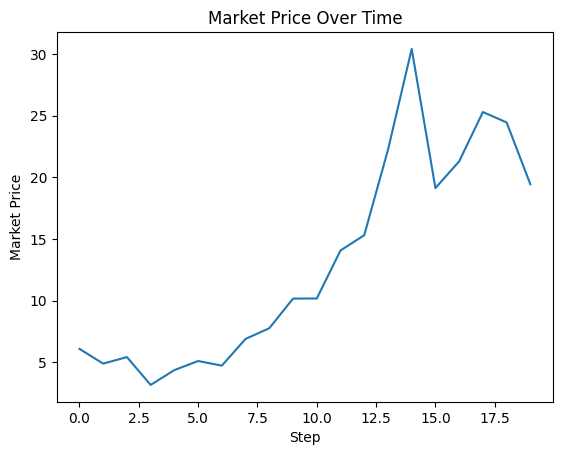

In [14]:
import mesa
import random
import matplotlib.pyplot as plt
import math

# Logistic function to determine buying/selling probability
def logistic(x, x0, k):
    return 1 / (1 + math.exp(-k * (x - x0)))

# Agent class
class Agent(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 100
        self.goods = 10  # Set to 10

    def step(self):
        # Calculate probability of buying or selling based on current market price
        price = self.model.market_price
        buy_probability = logistic(price, 5, -0.5)  # Probability of buying if price is low
        sell_probability = logistic(price, 5, 0.5)  # Probability of selling if price is high

        # Agents decide to buy or sell based on calculated probabilities
        if random.random() < buy_probability:
            self.buy()
        elif random.random() < sell_probability:
            self.sell()

    def buy(self):
        seller = self.random.choice(self.model.schedule.agents)
        while seller == self or seller.goods <= 0:
            seller = self.random.choice(self.model.schedule.agents)
        price = self.model.market_price
        if self.wealth >= price:
            self.wealth -= price
            self.goods += 1
            seller.wealth += price
            seller.goods -= 1
            self.model.total_demand += 1
            self.model.total_supply -= 1

    def sell(self):
        buyer = self.random.choice(self.model.schedule.agents)
        while buyer == self or buyer.wealth < self.model.market_price:
            buyer = self.random.choice(self.model.schedule.agents)
        price = self.model.market_price
        if self.goods > 0:
            self.wealth += price
            self.goods -= 1
            buyer.wealth -= price
            buyer.goods += 1
            self.model.total_demand -= 1
            self.model.total_supply += 1

class TradeModel(mesa.Model):
    def __init__(self, N, initial_market_price):
        self.num_agents = N
        self.market_price = initial_market_price
        self.total_supply = 0
        self.total_demand = 0
        self.schedule = mesa.time.RandomActivation(self)
        self.market_prices = []
       
        # Create agents
        for i in range(self.num_agents):
            a = Agent(i, self)
            self.schedule.add(a)
            self.total_supply += a.goods  # Add initial goods to total supply

    def adjust_price(self):
        # Prevent division by zero
        if self.total_supply == 0:
            self.total_supply = 1

        # Calculate change ratio
        change_ratio = self.total_demand / self.total_supply

        # Prevent drastic price changes by applying a reasonable change ratio range
        change_ratio = random.uniform(0.5,1.5)

        # Update market price based on change ratio
        self.market_price *= change_ratio

        # Reset total demand and supply for the next step
        self.total_demand = 0
        self.total_supply = 0

        # Store the new market price
        self.market_prices.append(self.market_price)
        print(f"Adjusted market price: {self.market_price:.2f}")

    def step(self):
        self.schedule.step()
        self.adjust_price()

# Initialize model with 50 agents and an initial market price of 5
model = TradeModel(N=50, initial_market_price=10)

# Run the model for 20 steps
for _ in range(20):
    model.step()

# Plot market price over time
plt.plot(model.market_prices)
plt.xlabel('Step')
plt.ylabel('Market Price')
plt.title('Market Price Over Time')
plt.show()


/var/folders/f8/0gwttb0n7m7fc82mp96c15200000gn/T/ipykernel_47205/14124313.py:13: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Adjusted market price: 4.96, ratio: 0.99
Adjusted market price: 4.80, ratio: 0.97
Adjusted market price: 5.37, ratio: 1.12
Adjusted market price: 5.59, ratio: 1.04
Adjusted market price: 6.94, ratio: 1.24
Adjusted market price: 5.46, ratio: 0.79
Adjusted market price: 5.29, ratio: 0.97
Adjusted market price: 4.09, ratio: 0.77
Adjusted market price: 3.84, ratio: 0.94
Adjusted market price: 4.36, ratio: 1.14
Adjusted market price: 4.57, ratio: 1.05
Adjusted market price: 4.76, ratio: 1.04
Adjusted market price: 5.08, ratio: 1.07
Adjusted market price: 5.55, ratio: 1.09
Adjusted market price: 4.67, ratio: 0.84
Adjusted market price: 4.98, ratio: 1.07
Adjusted market price: 5.72, ratio: 1.15
Adjusted market price: 5.58, ratio: 0.98
Adjusted market price: 5.43, ratio: 0.97
Adjusted market price: 4.98, ratio: 0.92
Adjusted market price: 4.94, ratio: 0.99
Adjusted market price: 5.02, ratio: 1.02
Adjusted market price: 5.36, ratio: 1.07
Adjusted market price: 5.11, ratio: 0.95
Adjusted market 

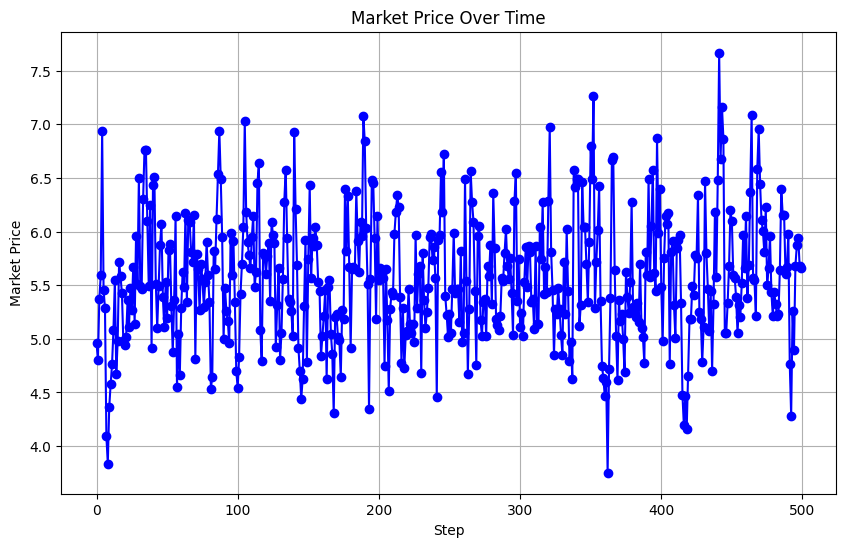

In [85]:
import mesa
import random
import matplotlib.pyplot as plt
import numpy as np

# Logistic function
def logistic(x, x0=5, k=0.1):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Agent
class Agent(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 100
        self.goods = 10  # Initial goods

    def step(self):
        # Determine probabilities for buying and selling based on market price
        buy_prob = 1 - logistic(self.model.market_price)
        sell_prob = 1 - buy_prob

        if random.random() < buy_prob:
            self.buy()
        else:
            self.sell()

    def buy(self):
        seller = self.random.choice(self.model.schedule.agents)
        while seller == self or seller.goods <= 0:
            seller = self.random.choice(self.model.schedule.agents)
        price = self.model.market_price
        if self.wealth >= price:
            self.wealth -= price
            self.goods += 1
            seller.wealth += price
            seller.goods -= 1
            self.model.total_demand += 1

    def sell(self):
        buyer = self.random.choice(self.model.schedule.agents)
        while buyer == self or buyer.wealth < self.model.market_price:
            buyer = self.random.choice(self.model.schedule.agents)
        price = self.model.market_price
        if self.goods > 0:
            self.wealth += price
            self.goods -= 1
            buyer.wealth -= price
            buyer.goods += 1
            self.model.total_supply += 1

# Model
class TradeModel(mesa.Model):
    def __init__(self, N, initial_market_price):
        self.num_agents = N
        self.market_price = initial_market_price
        self.total_demand = 1
        self.total_supply = 1
        self.schedule = mesa.time.RandomActivation(self)
        self.market_prices = []
        self.ratio = []

        # Create agents
        for i in range(self.num_agents):
            a = Agent(i, self)
            self.schedule.add(a)

    def adjust_price(self):
        # Calculate demand and supply ratio
        demand_supply_ratio = self.total_demand / self.total_supply

        # Store the demand supply ratio
        self.ratio.append(demand_supply_ratio)
        
        # Adjust market price, Update 1.1, this creates assymetry - because (d/s - 1) =/= (d/s - 1) for d=s
        # price_change = 0.25 * (demand_supply_ratio - 1)  # Small adjustment factor

        # Update market price
        self.market_price = self.market_price * demand_supply_ratio

        # Bound the price within a reasonable range
        if self.market_price < 0.01:
            self.market_price = 0.01

        # Reset total demand and supply for the next step
        self.total_demand = 1
        self.total_supply = 1

        # Store the new market price & new ratio
        self.market_prices.append(self.market_price)

        # Print the adjusted market price and demand/supply ratio
        print(f"Adjusted market price: {self.market_price:.2f}, ratio: {demand_supply_ratio:.2f}")

    def step(self):
        self.schedule.step()
        self.adjust_price()

# Run the model
num_agents = 500
initial_market_price = 5
model = TradeModel(num_agents, initial_market_price)

# Run for a number of steps and record market prices
num_steps = 500
for _ in range(num_steps):
    model.step()

# Plot the market prices over time
plt.figure(figsize=(10, 6))
plt.plot(model.market_prices, marker='o', linestyle='-', color='b')
plt.title('Market Price Over Time')
plt.xlabel('Step')
plt.ylabel('Market Price')
plt.grid(True)
plt.show()


In [86]:
# Find the agents with the most wealth + goods (standardized by the current market prize)
market_price = model.market_price
agents_total_value = [(agent.unique_id, agent.wealth + agent.goods * market_price) for agent in model.schedule.agents]

# Sort agents by total value in descending order
sorted_agents = sorted(agents_total_value, key=lambda x: x[1], reverse=True)

# Print the top 10 agents with the most wealth + goods
top_agents = sorted_agents[:10]
print("Top 10 agents with the most wealth + goods (standardized):")
for agent_id, total_value in top_agents:
    print(f"Agent {agent_id}: Total Value = {total_value:.2f}")

Top 10 agents with the most wealth + goods (standardized):
Agent 238: Total Value = 203.20
Agent 473: Total Value = 200.08
Agent 80: Total Value = 199.95
Agent 329: Total Value = 198.97
Agent 171: Total Value = 198.70
Agent 162: Total Value = 198.38
Agent 0: Total Value = 198.02
Agent 28: Total Value = 197.43
Agent 186: Total Value = 196.82
Agent 467: Total Value = 194.30


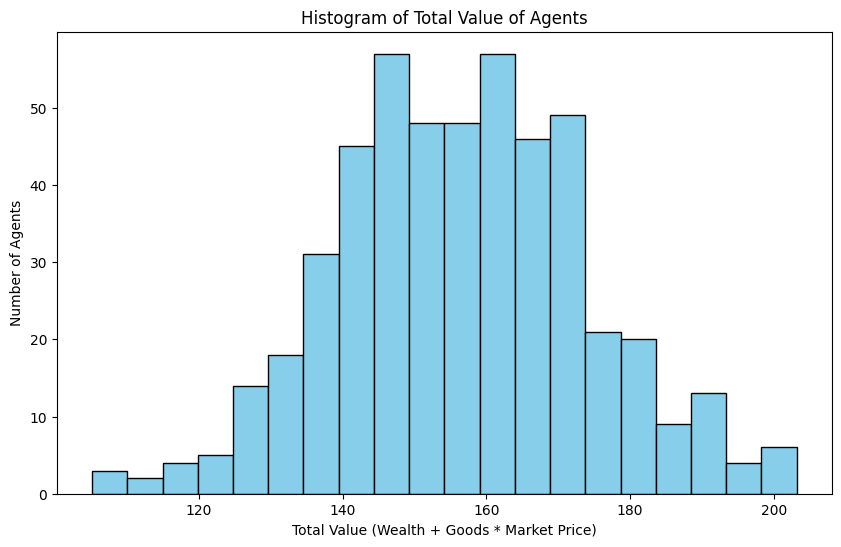

In [87]:
import matplotlib.pyplot as plt

# Calculate the total value for each agent at the end of the simulation
market_price = model.market_price
agents_total_value = [agent.wealth + agent.goods * market_price for agent in model.schedule.agents]

# Plot the histogram of the agents' total values
plt.figure(figsize=(10, 6))
plt.hist(agents_total_value, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Value of Agents')
plt.xlabel('Total Value (Wealth + Goods * Market Price)')
plt.ylabel('Number of Agents')
plt.grid(False)
plt.show()

In [5]:
# Logistic function to determine buying/selling probability
def logistic(x, x0, k):
    return 1 / (1 + math.exp(-k * (x - x0)))

# logistic(price, starting price, slope)
logistic(3,5,0.5)

0.2689414213699951

x = 0, logistic(x) = 0.0759
x = 1, logistic(x) = 0.1192
x = 2, logistic(x) = 0.1824
x = 3, logistic(x) = 0.2689
x = 4, logistic(x) = 0.3775
x = 5, logistic(x) = 0.5000
x = 6, logistic(x) = 0.6225
x = 7, logistic(x) = 0.7311
x = 8, logistic(x) = 0.8176
x = 9, logistic(x) = 0.8808
x = 10, logistic(x) = 0.9241


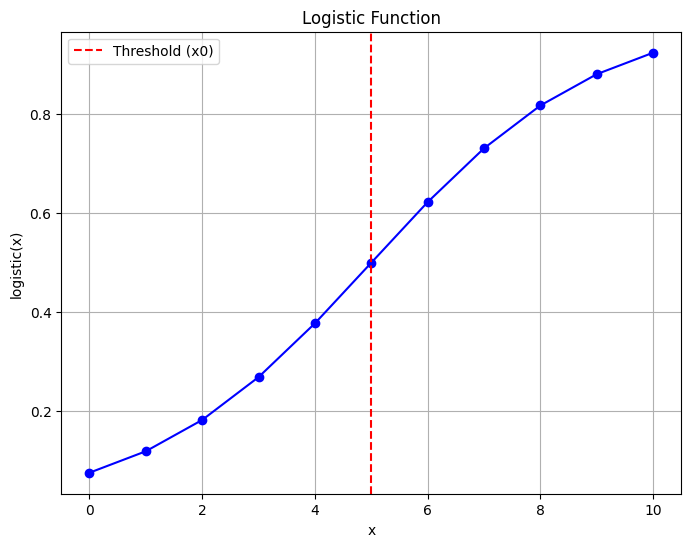

In [7]:
import math
import matplotlib.pyplot as plt

# Define the logistic function
def logistic(x, x0, k):
    return 1 / (1 + math.exp(-k * (x - x0)))

# Define parameters for the logistic function
x0 = 5    # Threshold value
k = 0.5      # Slope of the logistic function

# Generate x values for plotting
x_values = range(0, 11)  # Values from 0 to 10
y_values = [logistic(x, x0, k) for x in x_values]

# Print results
for x, y in zip(x_values, y_values):
    print(f"x = {x}, logistic(x) = {y:.4f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.axvline(x0, color='r', linestyle='--', label='Threshold (x0)')
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/f8/0gwttb0n7m7fc82mp96c15200000gn/T/ipykernel_47205/859730896.py:5: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


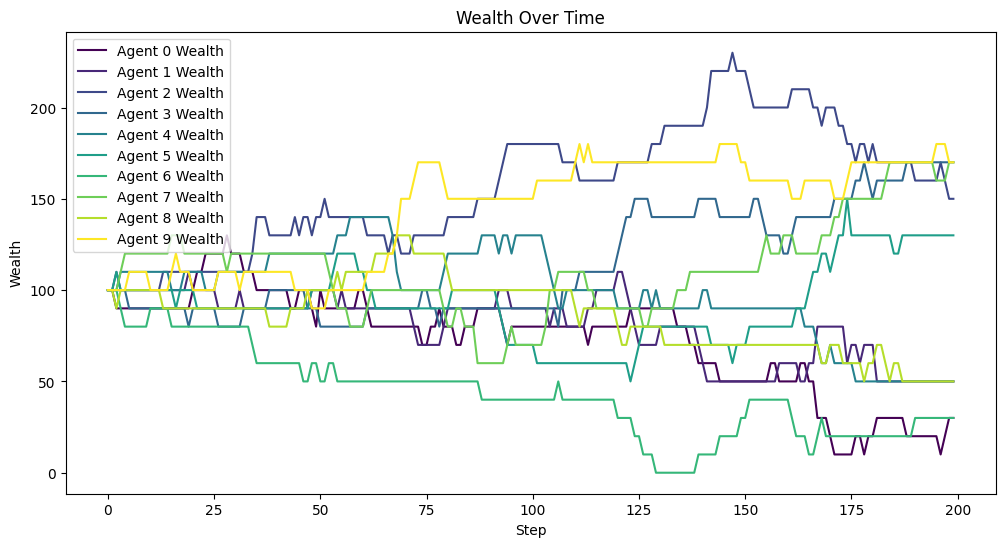

AttributeError: module 'matplotlib.pyplot' has no attribute 't'

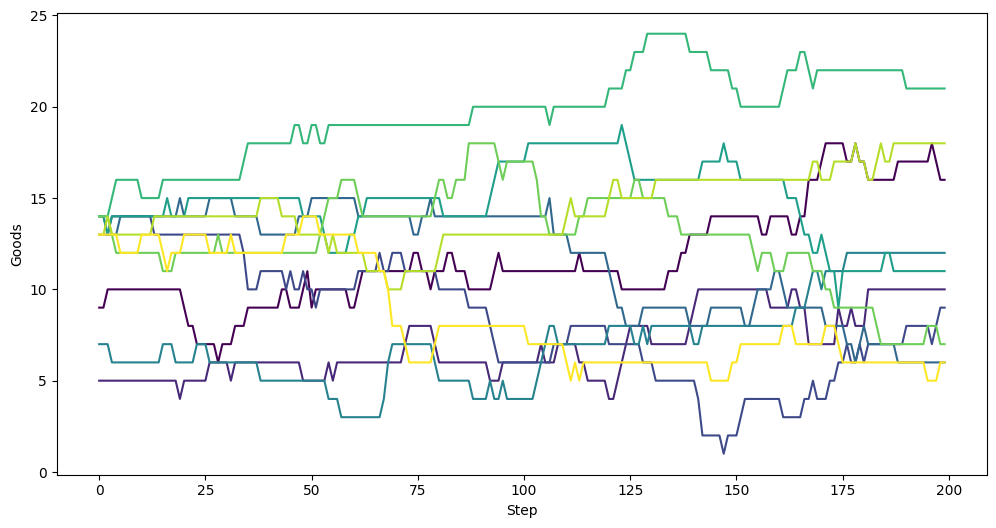

In [43]:
from mesa import Agent

class TradeAgent(Agent):
    def __init__(self, unique_id, model, wealth=100, goods=10):
        super().__init__(unique_id, model)
        self.wealth = wealth
        self.goods = goods

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def step(self):
        self.move()

        # Get the list of agents in the same cell
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        # Exclude itself from the list of cellmates
        cellmates = [agent for agent in cellmates if agent.unique_id != self.unique_id]

        # Proceed only if there are other agents in the same cell
        if cellmates:
            other_agent = self.random.choice(cellmates)
            self.trade(other_agent)

    def trade(self, other_agent):
        if self.random.choice(["buy", "sell"]) == "buy":
            self.buy(other_agent)
        else:
            self.sell(other_agent)

    def buy(self, seller):
        if seller.goods > 0 and self.wealth > 0:
            # Define the price of goods
            price_per_good = 10  # for example, 10 units of wealth per good
            goods_to_buy = 1
            cost = goods_to_buy * price_per_good

            seller.goods -= goods_to_buy
            seller.wealth += cost
            self.goods += goods_to_buy
            self.wealth -= cost

    def sell(self, buyer):
        if self.goods > 0 and buyer.wealth > 0:
            # Define the price of goods
            price_per_good = 10  # for example, 10 units of wealth per good
            goods_to_sell = 1
            revenue = goods_to_sell * price_per_good

            self.goods -= goods_to_sell
            self.wealth += revenue
            buyer.goods += goods_to_sell
            buyer.wealth -= revenue
from mesa import Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

class TradeModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            wealth = 100
            goods = self.random.randint(5, 15)  # Initial goods can be random or fixed
            agent = TradeAgent(i, self, wealth, goods)
            self.schedule.add(agent)

            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(agent, (x, y))

        self.datacollector = DataCollector(
            agent_reporters={"Wealth": "wealth", "Goods": "goods"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

# Running the model
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_agents = 10
width = 10
height = 10
num_steps = 200

# Initialize the model
model = TradeModel(num_agents, width, height)

# Run the model
for i in range(num_steps):
    model.step()

# Collect data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Generate colors for agents
colors = plt.cm.viridis(np.linspace(0, 1, num_agents))

# Plot Wealth
plt.figure(figsize=(12, 6))
for i, color in zip(range(num_agents), colors):
    agent_wealth = agent_data.xs(i, level="AgentID")["Wealth"]
    plt.plot(agent_wealth, label=f"Agent {i} Wealth", color=color)
plt.xlabel("Step")
plt.ylabel("Wealth")
plt.title("Wealth Over Time")
plt.legend(loc='best')
plt.show()

# Plot Goods
plt.figure(figsize=(12, 6))
for i, color in zip(range(num_agents), colors):
    agent_goods = agent_data.xs(i, level="AgentID")["Goods"]
    plt.plot(agent_goods, label=f"Agent {i} Goods", color=color)
plt.xlabel("Step")
plt.ylabel("Goods")
plt.t
